<a href="https://colab.research.google.com/github/Priyadrshi/docs/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Priyadrshi/docs/main/netflix_titles.csv')


In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df.head()
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
shows=df[df['type']=='TV Show']
shows.head()
movies = df[df['type']=='Movie']
movies.head()
df.groupby(by='type').size()

type
Movie      6131
TV Show    2676
dtype: int64

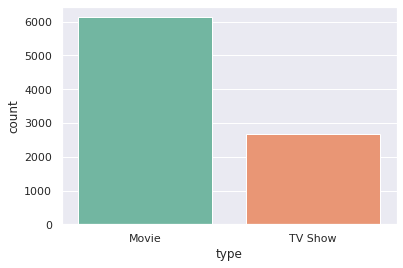

In [ ]:
ax = sns.countplot(x="type", data=df, palette="Set2")
ax

In [ ]:
df.groupby(by='rating').size().sort_values(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
dtype: int64

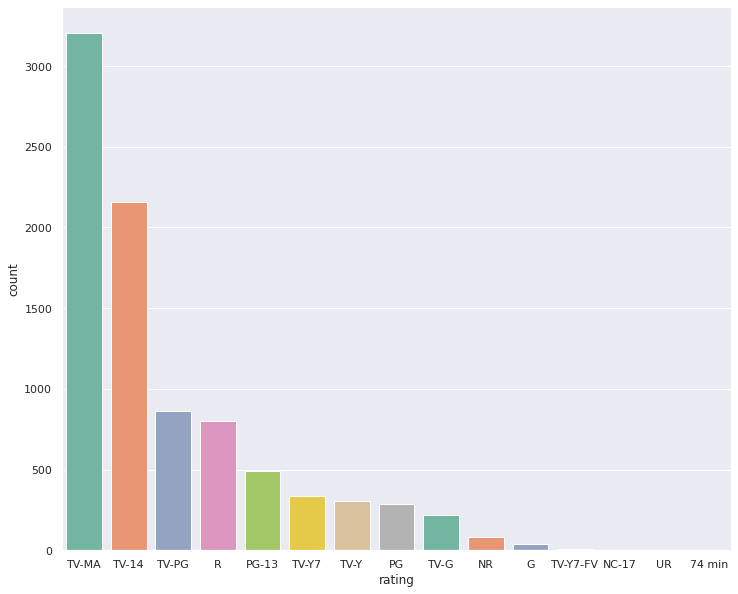

In [ ]:
plt.figure(figsize=(12,10))
dx=sns.countplot(x="rating", data=df, palette="Set2",order=df['rating'].value_counts().index[0:15])
dx

In [ ]:
df.groupby(by='release_year').size().sort_values(ascending=False)[0:5]

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
dtype: int64

In [ ]:
df.groupby(by='director').size().sort_values(ascending=False)[0:5]

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
dtype: int64

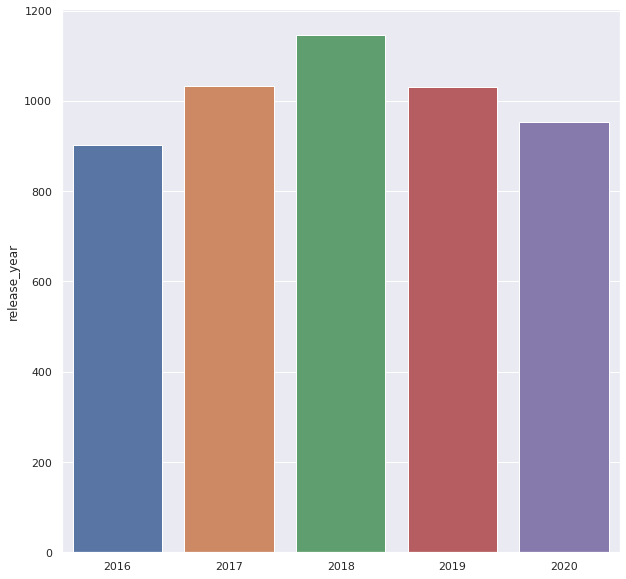

In [ ]:
bar, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = df['release_year'].value_counts().index[:5], y = df['release_year'].value_counts()[:5])

In [ ]:
df.groupby(by='listed_in').size().sort_values(ascending=False)[0:5]

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
dtype: int64

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
dtype: int64


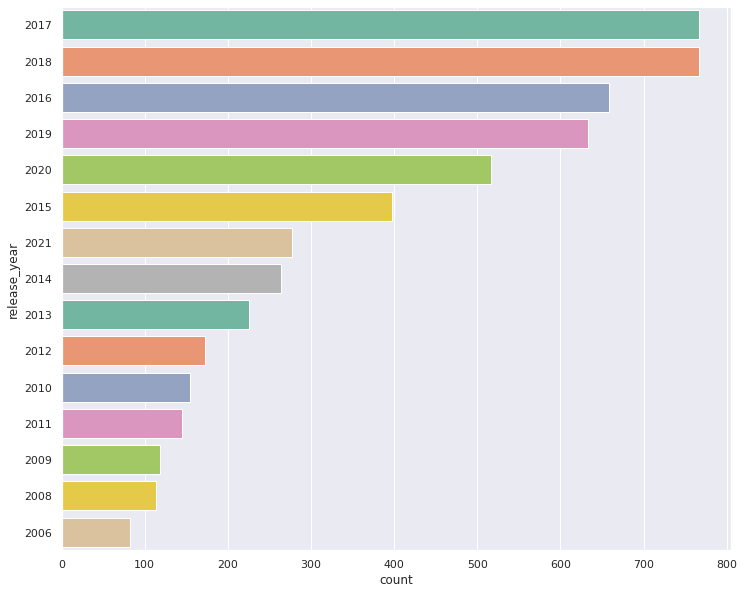

In [ ]:
movies = df[df['type']=='Movie']
print(movies.groupby(by='release_year').size().sort_values(ascending=False)[0:5])


plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=movies, palette="Set2", order=movies['release_year'].value_counts().index[0:15])



In [ ]:
country=df.groupby(by='country').size().sort_values(ascending=False)
country[0:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
dtype: int64

In [ ]:
movies.groupby(by='country').size().sort_values(ascending=False)[0:5]

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices[1:5]

title
Blood & Water            1
Ganglands                2
Jailbirds New Orleans    3
Kota Factory             4
dtype: int64

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    print(sim_scores)

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Peaky Blinders')

[(7683, 0.13434339215316093), (2646, 0.11862150098155227), (3133, 0.11837692250723159), (8293, 0.11807628697545637), (7140, 0.11405485220406086), (7785, 0.1117649875971114), (8467, 0.10780775727496507), (8539, 0.10743235235667388), (1510, 0.10384777440908519), (8391, 0.10246794470139631)]


7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [ ]:
get_recommendations('Mortel')

[(256, 0.19168030159984872), (3674, 0.16567069133655177), (800, 0.16277022204974517), (4511, 0.15856983132822092), (6749, 0.15856170404223924), (7535, 0.15552206711558947), (6760, 0.15001182668623614), (4918, 0.1475222859731592), (5481, 0.14093063513142942), (2190, 0.13925750649057855)]


256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
4511         Edgar Rice Burroughs' Tarzan and Jane
6749                             Figures of Speech
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

In [ ]:
get_recommendations('Transformers: Robots in Disguise')

[(4651, 0.228297658064508), (882, 0.1437905349155127), (2382, 0.13871573783780577), (970, 0.13284822154346265), (2911, 0.12981823868444697), (3958, 0.12006732713947374), (719, 0.11431898206670646), (6445, 0.10924159624998483), (3667, 0.10832086249385123), (3674, 0.10766700137893226)]


4651                      Transformers Prime
882                   Jungle Beat: The Movie
2382                            The Darkness
970                      Battle: Los Angeles
2911    A Shaun the Sheep Movie: Farmageddon
3958                                Ultraman
719                  Power Rangers Dino Fury
6445                          Chappaquiddick
3667                3Below: Tales of Arcadia
3674            PILI Fantasy: War of Dragons
Name: title, dtype: object

In [ ]:
filledna=df.fillna('')
filledna.head(2)
filledna.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]
filledna.head(2)
filledna.tail()

,title,director,cast,listed_in,description
8802,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,,,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
dnew= {'title':'taare zameen par',
       'director' :'aamir khan, amole gupte',
       'cast' :'Aamir Khan, darsheel safary',
       'listed_in':'childrens film, drama',
       'description':' The film explores the life and imagination of Ishaan, an 8-year-old dyslexic child. Although he excels in art, his poor academic performance leads his parents to send him to a boarding school. Ishaans new art teacher suspects that he is dyslexic and helps him to overcome his disability. Darsheel Safary stars as 8-year-old Ishaan, and Aamir Khan plays his art teacher.'}
filledna= filledna.append(dnew, ignore_index = True)
filledna.tail()

#filledna.loc[len(filledna.index)] = ['taare zameen par, 'aamir khan, amole gupte', 'Aamir Khan, darsheel safary','ip',' The film explores the life and imagination of Ishaan, an 8-year-old dyslexic child. Although he excels in art, his poor academic performance leads his parents to send him to a boarding school. Ishaans new art teacher suspects that he is dyslexic and helps him to overcome his disability. Darsheel Safary stars as 8-year-old Ishaan, and Aamir Khan plays his art teacher.']

,title,director,cast,listed_in,description
8803,Zombie Dumb,,,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,taare zameen par,"aamir khan, amole gupte","Aamir Khan, darsheel safary","childrens film, drama",The film explores the life and imagination of...


In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [ ]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
filledna['soup'] = filledna.apply(create_soup, axis=1)
filledna.head(2)

,title,director,cast,listed_in,description,soup
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead kirstenjohnson documentarie...
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...","blood&water amaqamata,khosingema,gailmabalane..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
filledna.tail()

,index,title,director,cast,listed_in,description,soup
8803,8803,zombiedumb,,,"kids'tv,koreantvshows,tvcomedies","whilelivingaloneinaspookytown,ayounggirlbefrie...","zombiedumb kids'tv,koreantvshows,tvcomedies ..."
8804,8804,zombieland,rubenfleischer,"jesseeisenberg,woodyharrelson,emmastone,abigai...","comedies,horrormovies","lookingtosurviveinaworldtakenoverbyzombies,ado...","zombieland rubenfleischer jesseeisenberg,woody..."
8805,8805,zoom,peterhewitt,"timallen,courteneycox,chevychase,katemara,ryan...","children&familymovies,comedies","draggedfromcivilianlife,aformersuperheromusttr...","zoom peterhewitt timallen,courteneycox,chevych..."
8806,8806,zubaan,mozezsingh,"vickykaushal,sarah-janedias,raaghavchanana,man...","dramas,internationalmovies,music&musicals",ascrappybutpoorboywormshiswayintoatycoon'sdysf...,"zubaan mozezsingh vickykaushal,sarah-janedias,..."
8807,8807,taarezameenpar,"aamirkhan,amolegupte","aamirkhan,darsheelsafary","childrensfilm,drama","thefilmexploresthelifeandimaginationofishaan,a...","taarezameenpar aamirkhan,amolegupte aamirkhan,..."


In [ ]:
get_recommendations_new('PK', cosine_sim)

3714                                        Unbroken
4221                           Merku Thodarchi Malai
7129                                  Jhansi Ki Rani
906     Have You Ever Seen Fireflies? - Theatre Play
4306                                            ROMA
6031                              A Clockwork Orange
4569                        Harishchandrachi Factory
4565                              Ek Main Aur Ekk Tu
4700                         Bhavesh Joshi Superhero
2148                                    The Governor
Name: title, dtype: object

In [ ]:
get_recommendations_new('PK', cosine_sim2)

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
6907                             Haapus
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
195     EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [ ]:
get_recommendations_new('Taare Zameen Par', cosine_sim2)

ValueError: ignored

In [ ]:
temp = df[['type', 'release_year']]
temp = temp.value_counts().to_frame()
temp=temp.rename(columns={0:'counts'})
temp.reset_index(level=[0,1],inplace=True)
temp = pd.concat([temp[temp['type'] == 'Movie'][:10], temp[temp['type']== 'TV Show'][:10]])

#temp.sort_values


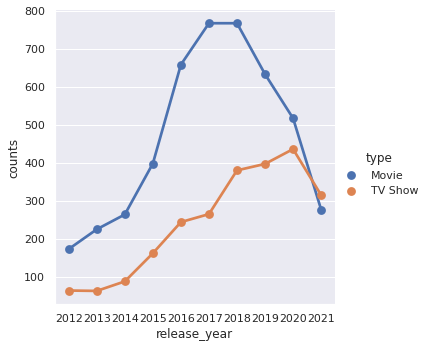

In [ ]:
sns.catplot(x = 'release_year', y = 'counts', hue = 'type', data = temp, kind = 'point')